In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [5]:
dfForest = pd.read_csv("Algerian_forest_fires_cleaned.csv",)
dfForest.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
dfForest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [7]:
dfForest.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [8]:
dfForest.duplicated().sum()

0

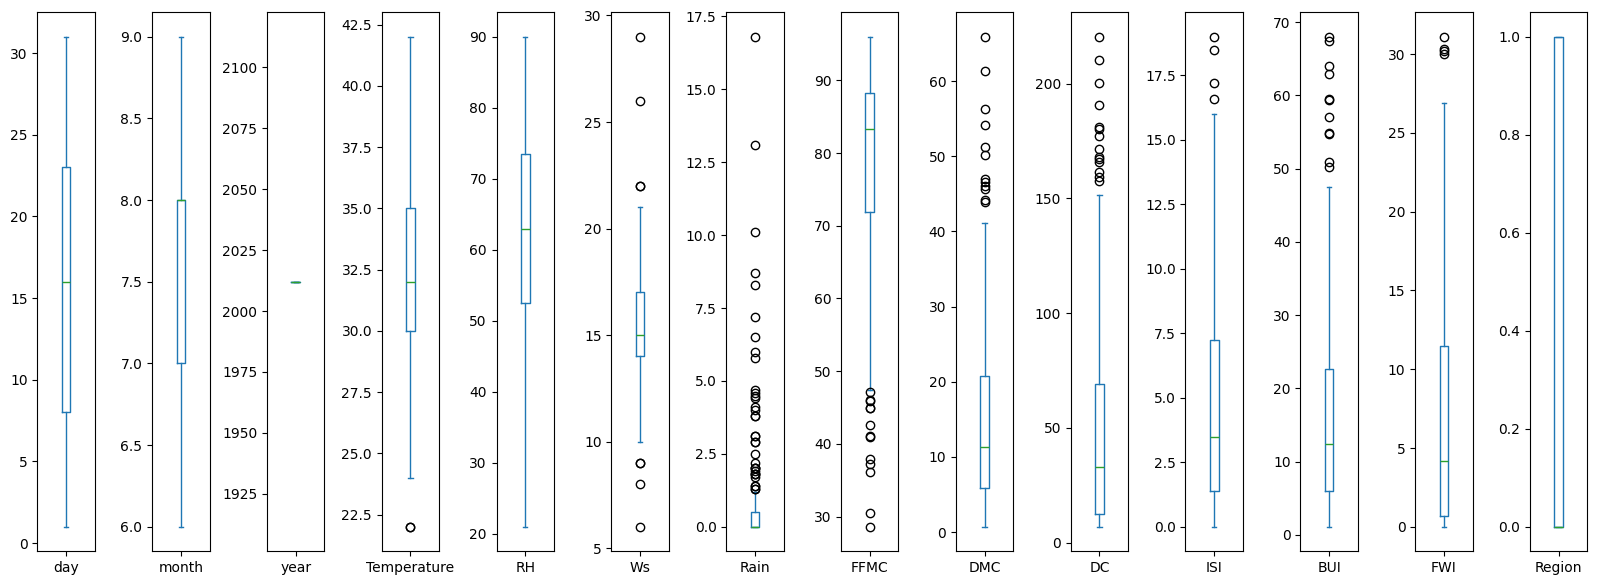

In [14]:

dfForest.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(20, 7)
)

plt.subplots_adjust(wspace=1)  
plt.show()  


In [15]:
dfForest.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
#Removing outliers for every other columns other than RH
for column in ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']:
    Q1 = dfForest[column].quantile(0.25)
    Q3 = dfForest[column].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    dfForest = dfForest[(dfForest[column] >= lowerBound) & (dfForest[column] <= upperBound)]

In [17]:
dfForest.shape

(155, 15)

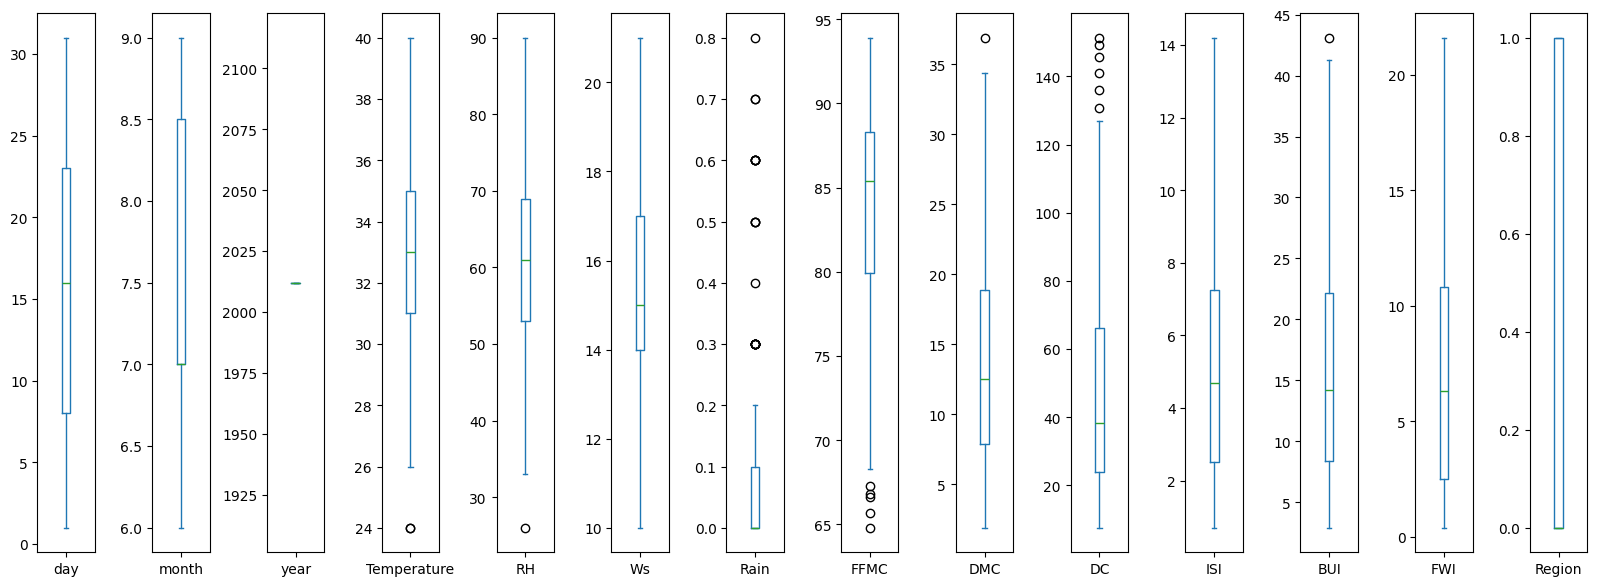

In [18]:
dfForest.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(20, 7)
)
plt.subplots_adjust(wspace=1) 
plt.show()

In [59]:
non_numeric_columns = dfForest.select_dtypes(exclude='number').columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Classes'], dtype='object')


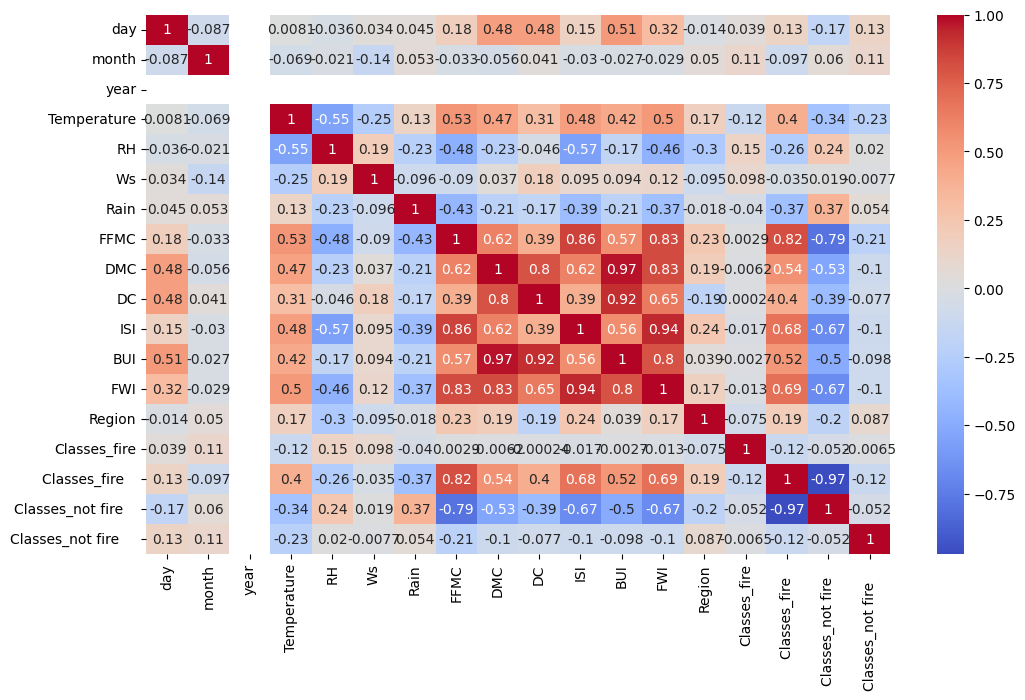

In [60]:
# Identify non-numeric columns
non_numeric_columns = dfForest.select_dtypes(exclude='number').columns

# One-hot encode the 'Classes' column
dfForest_encoded = pd.get_dummies(dfForest, columns=['Classes'])

# Calculate correlation matrix
corr_matrix = dfForest_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [24]:
X = dfForest[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Region']]
Y = dfForest['FWI']

In [28]:
from sklearn.model_selection import train_test_split

# Now you can use train_test_split function
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)


In [30]:
from sklearn.preprocessing import StandardScaler
# Assuming trainX and testX are your feature matrices, and trainY and testY are your target variables

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
trainX_scaled = scaler.fit_transform(trainX)

# Transform the test data using the scaler fitted on the training data
testX_scaled = scaler.transform(testX)


In [32]:
from sklearn.linear_model import LinearRegression
Model1linear = LinearRegression()


In [35]:
Model1linear.fit(trainX_scaled, trainY)


LinearRegression()

In [37]:
Model1linear.coef_, Model1linear.intercept_

(array([ 7.66142189e-02,  1.03426229e-01, -1.77635684e-15,  9.70186426e-02,
        -4.35895603e-02,  4.04057221e-02, -1.74817394e-01, -3.05031870e-01,
        -6.03373627e-01, -6.78002795e-01,  3.96507877e+00,  3.43592820e+00,
        -1.45462523e-01]),
 7.499999999999999)

In [39]:
# Assuming lrModel1 is your trained linear regression model and testXsc is your scaled test data

y_pred = Model1linear.predict(testX_scaled)


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_model1 = mean_squared_error(testY, y_pred)
mae_model1 = mean_absolute_error(testY, y_pred)
rsq_model1 = r2_score(testY, y_pred)

print("LR Model 1 MSE:", mse_model1)
print("LR Model 1 MAE:", mae_model1)
print("LR Model 1 R2:", rsq_model1)


LR Model 1 MSE: 0.23429979069022122
LR Model 1 MAE: 0.36472099024860516
LR Model 1 R2: 0.99091926468938


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Considered columns based on correlation and coefficients from Model 1
X_new = dfForest[['month', 'Temperature', 'RH', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]

# Splitting the data into training and testing sets
trainX_new, testX_new, trainY_new, testY_new = train_test_split(X_new, Y, test_size=0.2, random_state=42)

# Standardizing the features
scaler_new = StandardScaler()
trainXsc_new = scaler_new.fit_transform(trainX_new)
testXsc_new = scaler_new.transform(testX_new)


In [42]:
from sklearn.linear_model import LinearRegression

# Define the Linear Regression model with the name model2linear
model2linear = LinearRegression()

# Fit the model on the scaled training data
model2linear.fit(trainXsc_new, trainY_new)

# Print the coefficients and intercept
print("Coefficients:", model2linear.coef_)
print("Intercept:", model2linear.intercept_)

Coefficients: [ 0.06876483  0.03428875  0.09023618 -0.2512949  -1.02488525 -0.70096689
  4.08661105  3.88384949]
Intercept: 7.499999999999999


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict using the model
y_pred_model2 = model2linear.predict(testXsc_new)

# Calculate metrics for Model 2
mse_model2 = mean_squared_error(testY_new, y_pred_model2)
mae_model2 = mean_absolute_error(testY_new, y_pred_model2)
rsq_model2 = r2_score(testY_new, y_pred_model2)

print("LR Model 2 MSE:", mse_model2)
print("LR Model 2 MAE:", mae_model2)
print("LR Model 2 R2:", rsq_model2)


LR Model 2 MSE: 0.22594358023092326
LR Model 2 MAE: 0.33571037847201907
LR Model 2 R2: 0.9912431255650436


In [47]:
import pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model2linear, file)
with open('scaler_model.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [48]:
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
with open('scaler_model.pkl', 'rb') as file2:
    loaded_scaler = pickle.load(file2)

In [49]:
dataX = [[6,31,64,86.8,17.8,71.8,6.7,21.6],
[8,34,53,89,21.6,80.3,9.2,25.8],
[9,32,55,89.1,25.5,88.5,7.6,29.7],
[6,32,47,79.9,18.4,84.4,2.2,23.8],
[6,33,50,88.7,22.9,92.8,7.2,28.3],
[9,29,68,59.9,2.5,8.6,1.1,2.9],
[9,27,75,55.7,2.4,8.3,0.8,2.8],
[7,32,76,63.1,2.6,9.2,1.3,3],
]

dataY = [10.6,15,13.9,3.9,12.9,0.4,0.3,0.5]

In [55]:
from sklearn.preprocessing import StandardScaler

# Assuming loaded_scaler is the loaded StandardScaler object
# Create a new StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the new data
scaler.fit(dataX)

# Transform the new data using the fitted scaler
scaledX = scaler.transform(dataX)



In [56]:
yPred = loaded_model.predict(scaledX)
mse = mean_squared_error(dataY,yPred)
mae = mean_absolute_error(dataY,yPred)
rsq = r2_score(dataY,yPred)
print("Linear Model MSE : ", mse)
print("Linear Model MAE : ", mae)
print("Linear Model R2 : ", rsq)

Linear Model MSE :  0.47244386070934496
Linear Model MAE :  0.5068994971911638
Linear Model R2 :  0.9873766184666455


In [ ]:
#Conclusion
 The analysis of the provided dataset revealed promising results for two Linear Regression models. The first model, Model 1, achieved an impressive R-squared (R2) score of 0.99, indicating that approximately 99% of the variance in the dependent variable can be explained by the independent variables. However, it had a Mean Squared Error (MSE) of 0.23 and a Mean Absolute Error (MAE) of 0.38. Following refinement, Model 2 displayed comparable performance with a slightly lower MSE of 0.22 and MAE of 0.33 while maintaining the same R2 score of 0.99. To further enhance predictive accuracy, exploring various combinations of independent variables with high correlation and coefficient values could be beneficial. Additionally, conducting feature engineering and robust model validation techniques are recommended to uncover hidden relationships and optimize model performance for applications such as forest fire risk assessment.